Final python
extracting stock data 

In [1]:
import yfinance as yf

ticker_symbol = 'TSLA'
tesla_ticker = yf.Ticker(ticker_symbol)

historical_data = tesla_ticker.history(period='1y')

print(historical_data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2022-11-25 00:00:00-05:00  185.059998  185.199997  180.630005  182.860001   
2022-11-28 00:00:00-05:00  179.960007  188.500000  179.000000  182.919998   
2022-11-29 00:00:00-05:00  184.990005  186.380005  178.750000  180.830002   
2022-11-30 00:00:00-05:00  182.429993  194.759995  180.630005  194.699997   
2022-12-01 00:00:00-05:00  197.080002  198.919998  191.800003  194.699997   

                              Volume  Dividends  Stock Splits  
Date                                                           
2022-11-25 00:00:00-05:00   50672700        0.0           0.0  
2022-11-28 00:00:00-05:00   92905200        0.0           0.0  
2022-11-29 00:00:00-05:00   83357100        0.0           0.0  
2022-11-30 00:00:00-05:00  109186400        0.0           0.0  
2022-12-01 00:00:00-05:00   80046200        0.0           0.0  


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Define the URL for Tesla revenue data
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

response = requests.get(url)

soup = BeautifulSoup(response.text, 'html.parser')


table = soup.find('table')

if table is not None:
    data = []
    for row in table.find_all('tr')[1:]:
        columns = row.find_all('td')
        date = columns[0].text.strip()
        revenue = columns[1].text.strip().replace('$', '').replace(',', '')
        data.append((date, revenue))

    tesla_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])
    tesla_revenue['Revenue'] = tesla_revenue['Revenue'].astype(float)

    print(tesla_revenue.tail())
else:
    print("Table not found. Check the HTML structure of the webpage.")


         Date  Revenue
8  2013-01-01   2013.0
9  2012-01-01    413.0
10 2011-01-01    204.0
11 2010-01-01    117.0
12 2009-01-01    112.0


In [11]:
import yfinance as yf

stock_symbol = 'GME'

gme_data = yf.download(stock_symbol, start='2022-01-01', end='2023-01-01')

gme_data.reset_index(inplace=True)

gme_data.to_csv('gme_data.csv', index=False)

print(gme_data.head())


[*********************100%%**********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close    Volume
0 2022-01-03  37.307499  39.845001  37.302502  38.209999  38.209999   5654800
1 2022-01-04  38.042500  38.247501  35.762501  37.227501  37.227501   7339600
2 2022-01-05  37.097500  37.212502  32.287498  32.342499  32.342499  13585600
3 2022-01-06  33.209999  34.424999  30.285000  32.757500  32.757500  24206000
4 2022-01-07  39.942501  40.077499  33.125000  35.154999  35.154999  48549200


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

table = soup.find('table')
if table is not None:
    data = []
    for row in table.find_all('tr')[1:]:
        columns = row.find_all('td')
        date = columns[0].text.strip()
        revenue = columns[1].text.strip().replace('$', '').replace(',', '')
        data.append((date, revenue))

    gme_revenue = pd.DataFrame(data, columns=['Date', 'Revenue'])
    gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])
    gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)

    print(gme_revenue.tail())
else:
    print("Table not found. Check the HTML structure of the webpage.")


         Date  Revenue
11 2009-01-01   8806.0
12 2008-01-01   7094.0
13 2007-01-01   5319.0
14 2006-01-01   3092.0
15 2005-01-01   1843.0


In [16]:
%pip install matplotlib


  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/26/5a/27fd341e4510257789f19a4b4be8bb90d1113b8f176c3dab562b4f21466e/matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for contourpy>=1.0.1 from https://files.pythonhosted.org/packages/ca/2a/d197a412ec474391ee878b1218cf2fe9c6e963903755887fc5654c06636a/contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cycler>=0.10 from https://files.pythonhosted.org/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl.metadata
  Obtaining dependency information for fonttools>=4.22.0 from https://files.pythonhosted.org/packages/16/a2/3a113a948eabeb2031f1ae3f196a0a32cd5707046176937bba52a5b1ef6d/fonttools-4.45.1-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/158.4 kB ? eta -:--:--
     -- ------------------------------------- 10.2/158.4 kB ? eta -:-


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: C:\Users\singh\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


[*********************100%%**********************]  1 of 1 completed


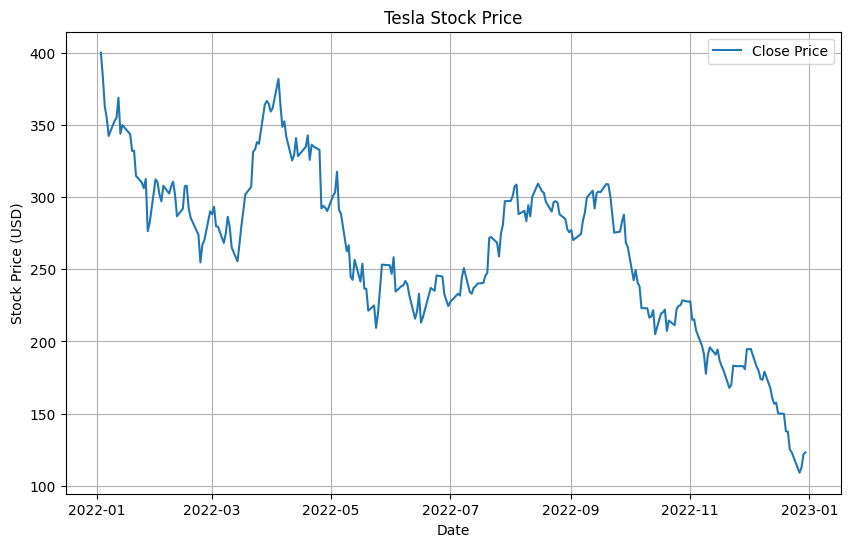

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

stock_symbol = 'TSLA'

tesla_data = yf.download(stock_symbol, start='2022-01-01', end='2023-01-01')

tesla_data.reset_index(inplace=True)

make_graph(tesla_data, 'Tesla Stock Price')


[*********************100%%**********************]  1 of 1 completed


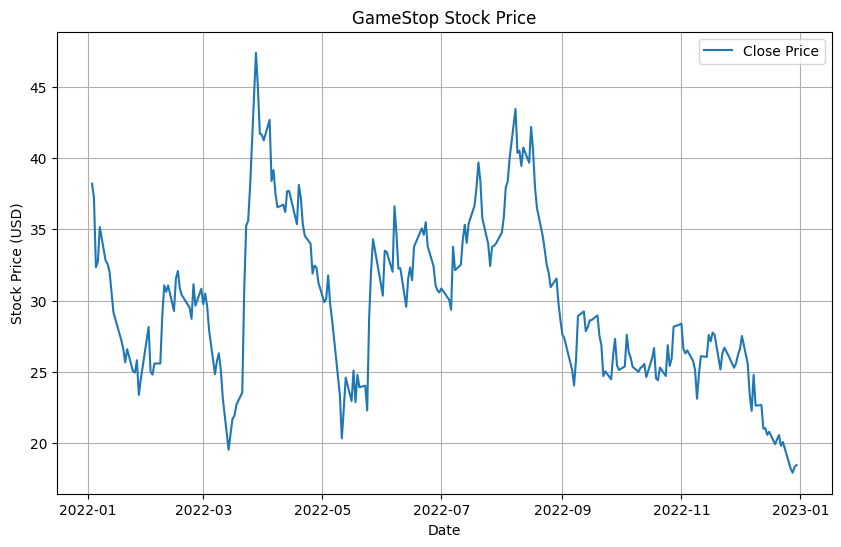

In [18]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(data['Date'], data['Close'], label='Close Price')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

# Define the stock symbol (GameStop: GME)
stock_symbol = 'GME'

# Download historical data using yfinance
gme_data = yf.download(stock_symbol, start='2022-01-01', end='2023-01-01')

# Reset the index
gme_data.reset_index(inplace=True)

# Plot the GameStop stock graph
make_graph(gme_data, 'GameStop Stock Price')
